In [50]:
# Load the dataset and preprocess it
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Load the dataset
terror = pd.read_csv('Resources/Terrorism_Dataset.csv', encoding='ISO-8859-1', low_memory=False)
terror.head()

,iyear,imonth,iday,country,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,target1,gname,motive,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN


In [3]:
# Rename columns for better readability
terror.rename(columns={
    'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country': 'Country', 
    'region_txt': 'Region', 'attacktype1_txt': 'AttackType', 'target1': 'Target', 
    'nkill': 'Killed', 'nwound': 'Wounded', 'gname': 'Group', 
    'targtype1_txt': 'Target_type', 'weaptype1_txt': 'Weapon_type', 'motive': 'Motive'
}, inplace=True)

In [4]:
# Select relevant columns
terror = terror[['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude', 'longitude', 
                 'AttackType', 'Killed', 'Wounded', 'Target', 'Group', 'Target_type', 
                 'Weapon_type', 'Motive']]
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


In [5]:
len(terror)

181691

In [6]:
# Calculate total casualties
terror['Casualties'] = terror['Killed'] + terror['Wounded']
terror['Casualties'] 

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    3.0
181687    9.0
181688    0.0
181689    0.0
181690    0.0
Name: Casualties, Length: 181691, dtype: float64

Question 1

In [7]:
# Country with the highest terrorist attacks
country_most_attacks = terror['Country'].value_counts().index[0]
print('Country with Highest Terrorist Attacks:', country_most_attacks)

Country with Highest Terrorist Attacks: Iraq


In [8]:
# Region with the highest terrorist attacks
region_most_attacks = terror['Region'].value_counts().index[0]
print('Regions with Highest Terrorist Attacks:', region_most_attacks)

Regions with Highest Terrorist Attacks: Middle East & North Africa


In [9]:
# Maximum people killed in an attack and the country it took place in
max_killed = terror['Killed'].max()
max_killed_country = terror.loc[terror['Killed'].idxmax()].Country
print('Maximum people killed in an attack are:', max_killed, 'that took place in', max_killed_country)

Maximum people killed in an attack are: 1570.0 that took place in Iraq


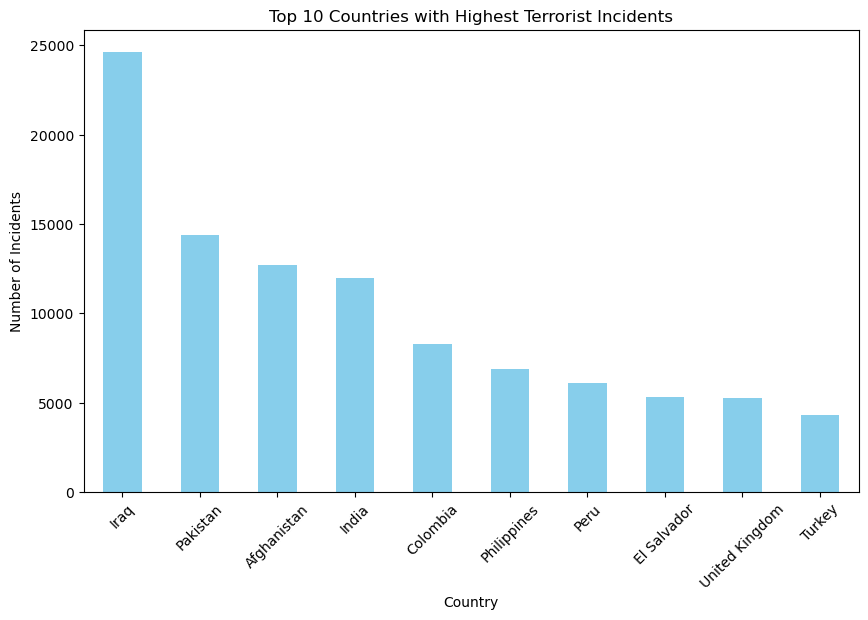

In [10]:
# Visualization 1: Incident Frequency by Country
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
terror['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Terrorist Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

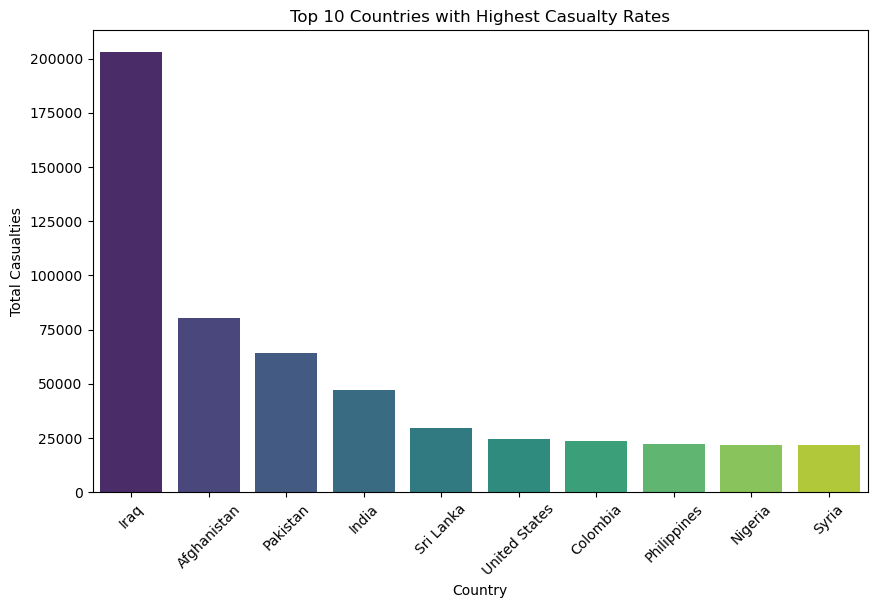

In [11]:
# Visualization 2: Casualty Rates by Country
import seaborn as sns

casualty_rates = terror.groupby('Country')['Casualties'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=casualty_rates.index, y=casualty_rates.values, palette='viridis')
plt.title('Top 10 Countries with Highest Casualty Rates')
plt.xlabel('Country')
plt.ylabel('Total Casualties')
plt.xticks(rotation=45)
plt.show()

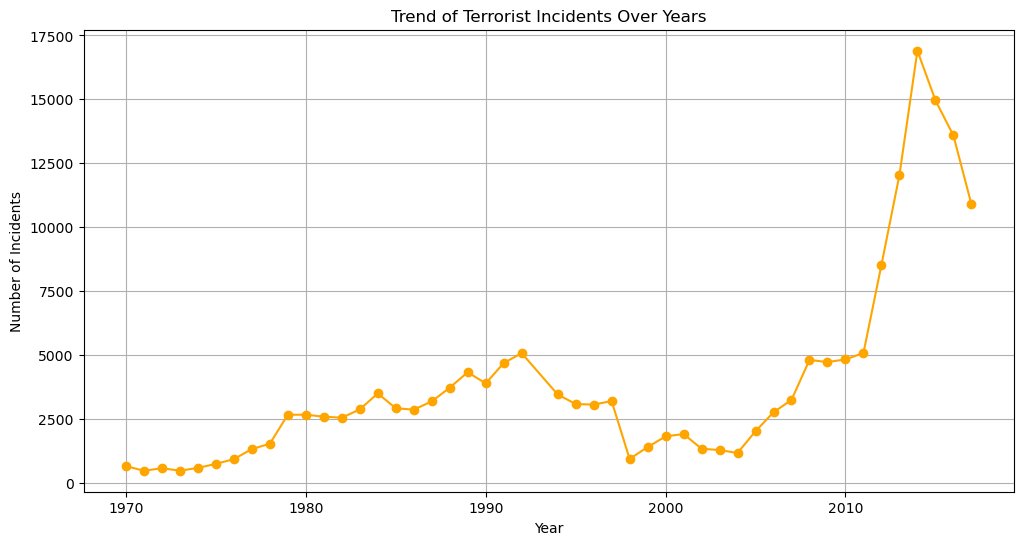

In [12]:
# Yearly Trends in Terrorist Incidents
plt.figure(figsize=(12, 6))
terror['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Trend of Terrorist Incidents Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

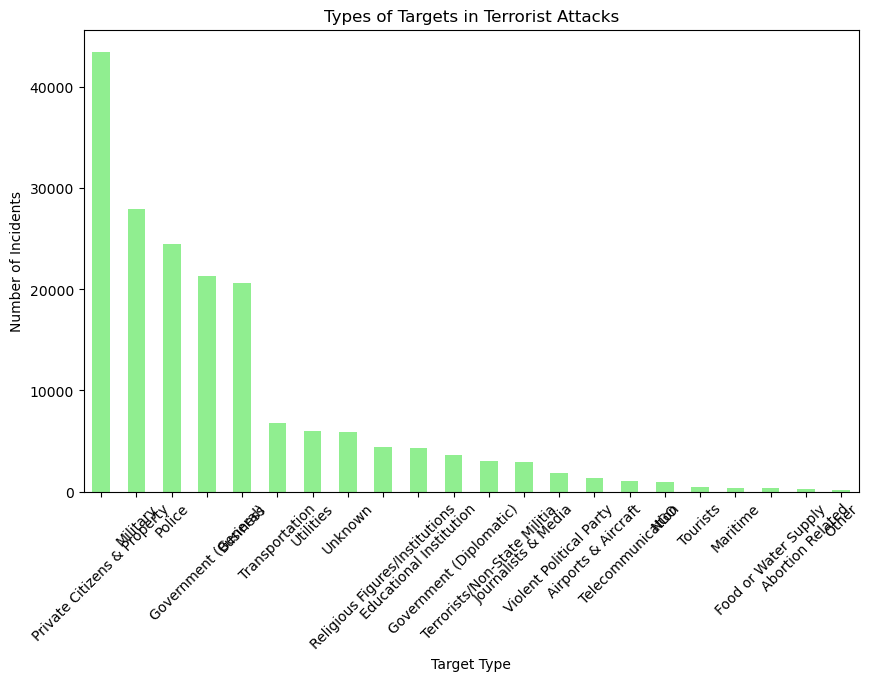

In [13]:
# Target Types
plt.figure(figsize=(10, 6))
terror['Target_type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Types of Targets in Terrorist Attacks')
plt.xlabel('Target Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

c:\Users\Rachel\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


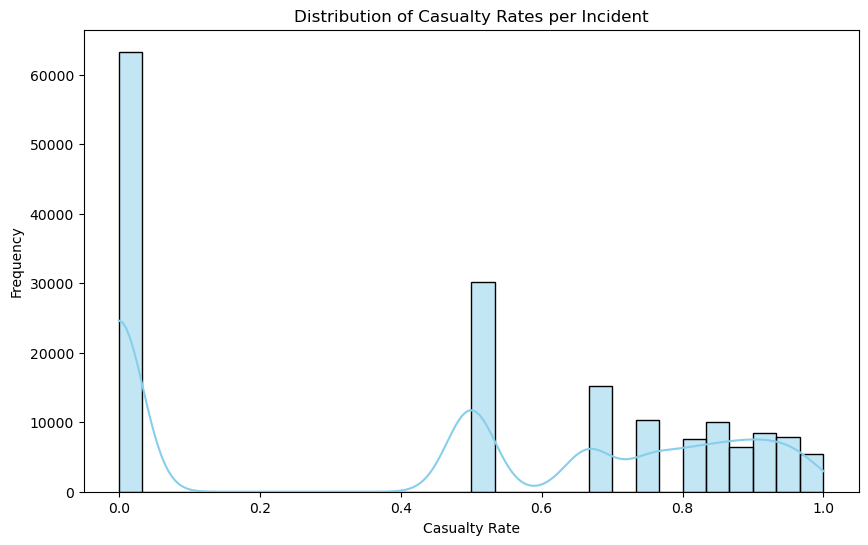

In [14]:
# Casualty Rates per Incident
terror['Casualty_Rate'] = terror['Casualties'] / (terror['Killed'] + terror['Wounded'] + 1)  # Adding 1 to avoid division by zero
plt.figure(figsize=(10, 6))
sns.histplot(terror['Casualty_Rate'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Casualty Rates per Incident')
plt.xlabel('Casualty Rate')
plt.ylabel('Frequency')
plt.show()

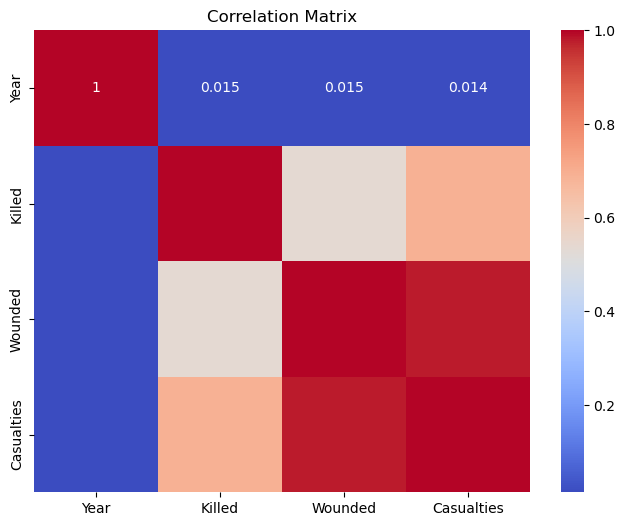

In [15]:
# Correlation Analysis
correlation_matrix = terror[['Year', 'Killed', 'Wounded', 'Casualties']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

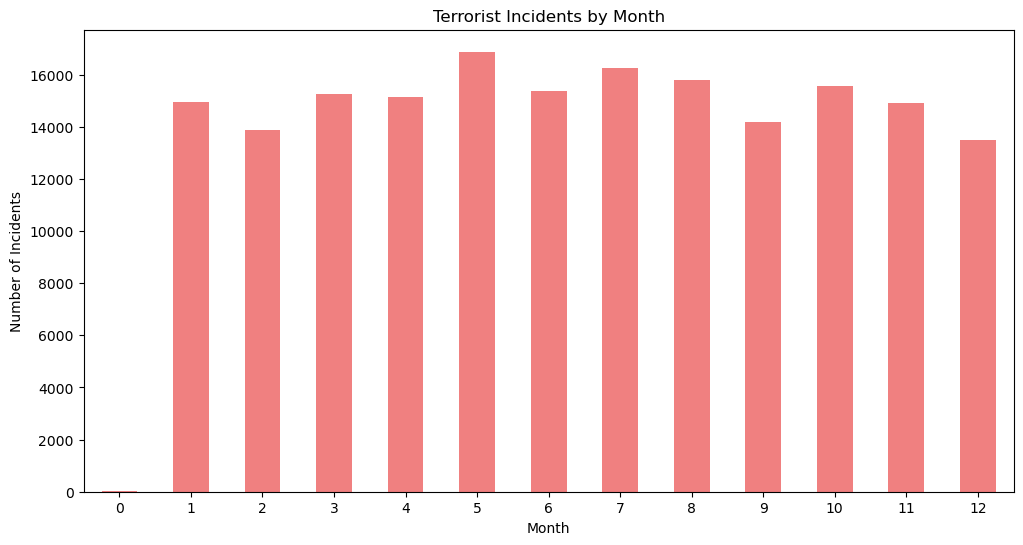

In [16]:
# Monthly Analysis
plt.figure(figsize=(12, 6))
terror['Month'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Terrorist Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.show()

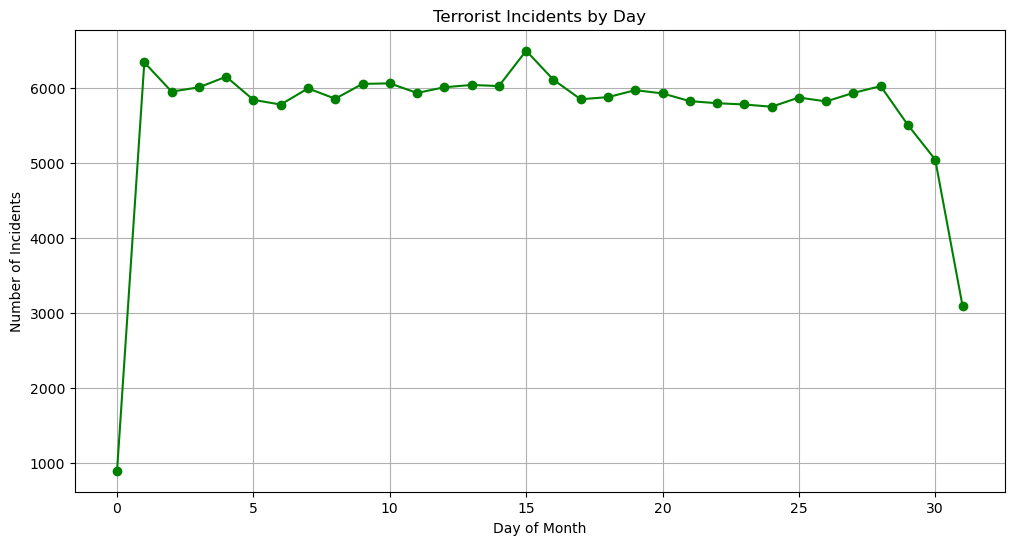

In [17]:
# Day-wise Analysis
plt.figure(figsize=(12, 6))
terror['Day'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Terrorist Incidents by Day')
plt.xlabel('Day of Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

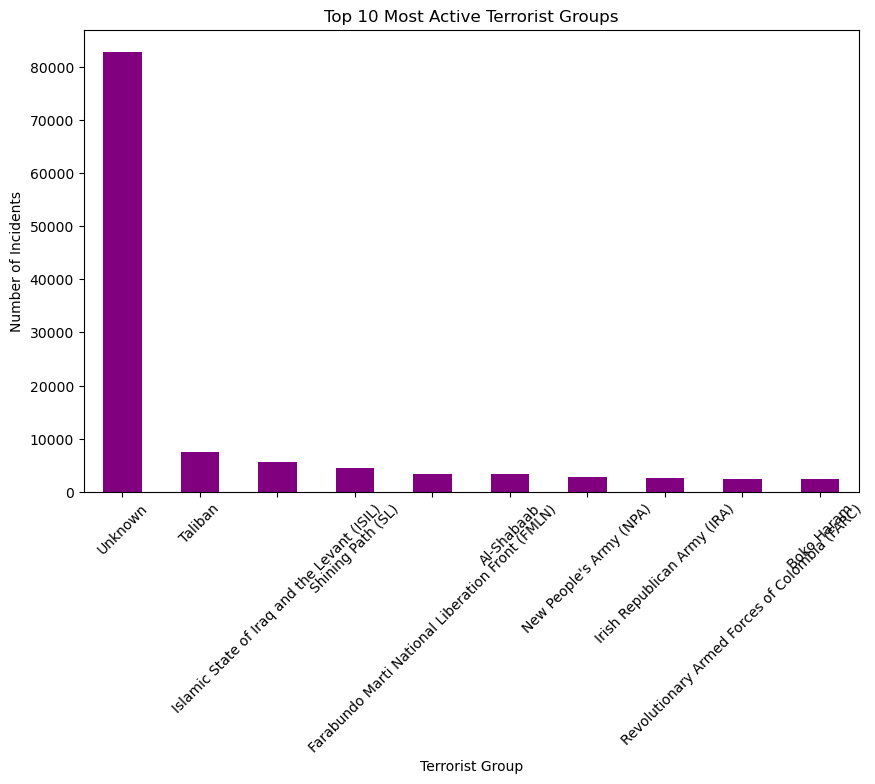

In [18]:
# Top 10 Most Active Terrorist Groups
plt.figure(figsize=(10, 6))
terror['Group'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Most Active Terrorist Groups')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

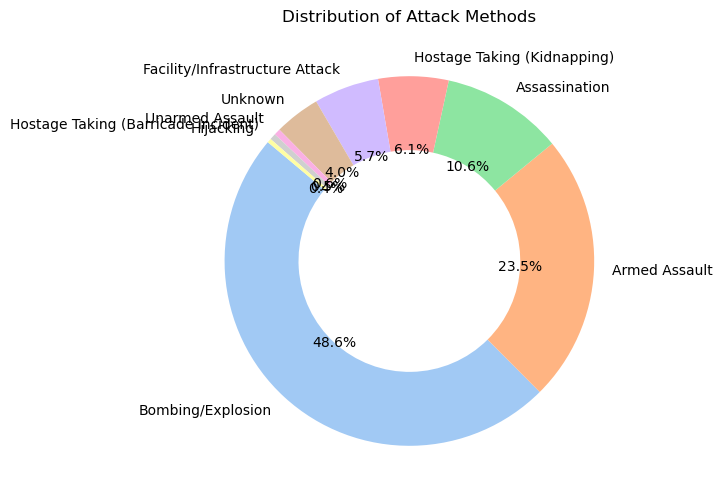

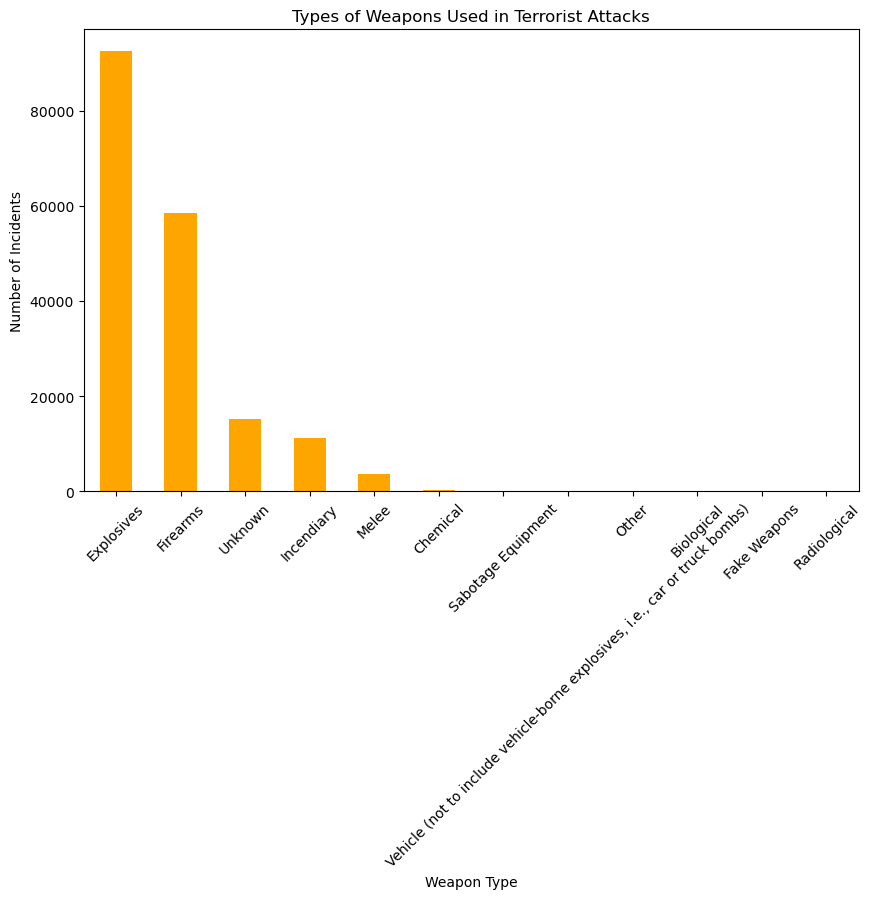

In [19]:
# Analysis of Attack Methods
plt.figure(figsize=(10, 6))
terror['AttackType'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.4))
plt.title('Distribution of Attack Methods')
plt.ylabel('')
plt.show()

# Analysis of Weapon Types
plt.figure(figsize=(10, 6))
terror['Weapon_type'].value_counts().plot(kind='bar', color='orange')
plt.title('Types of Weapons Used in Terrorist Attacks')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Step 1: Load the tourism dataset
tourism = pd.read_csv('Resources/tourism.csv')

# Renaming the 'Country' column to "Country"
tourism.rename(columns={'country': 'Country'}, inplace=True)


In [21]:
# Step 2: Merge the tourism dataset with the terrorism dataset on the 'Country' column
merged_data = pd.merge(terror, tourism, on='Country', how='left')

In [22]:
# Step 3: Clean up the merged dataset
# Check for missing values
print("Missing values in merged dataset:")
print(merged_data.isnull().sum())

Missing values in merged dataset:
Year                         0
Month                        0
Day                          0
Country                      0
Region                       0
city                       435
latitude                  4556
longitude                 4557
AttackType                   0
Killed                   10313
Wounded                  16311
Target                     638
Group                        0
Target_type                  0
Weapon_type                  0
Motive                  131130
Casualties               16874
Casualty_Rate            16874
tourists_in_millions    152117
receipts_in_billions    152117
receipts_per_tourist    152117
percentage_of_gdp       152117
dtype: int64


In [23]:
# Remove rows with missing values in 'tourists_in_millions' column
merged_data.dropna(subset=['tourists_in_millions'], inplace=True)

In [24]:
merged_data.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,...,Group,Target_type,Weapon_type,Motive,Casualties,Casualty_Rate,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,...,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0,0.0,51.1,11.45,224.0,0.9
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,...,Unknown,Journalists & Media,Unknown,NaN,1.0,0.5,1.5,2.77,1867.0,0.7
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,...,Unknown,Government (Diplomatic),Explosives,NaN,NaN,NaN,7.4,6.19,836.0,2.9
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,...,Unknown,Government (Diplomatic),Incendiary,NaN,NaN,NaN,4.1,11.40,2769.0,0.2
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0,0.0,45.0,84.21,1870.0,0.4


In [25]:
# Step 4: Analyze the impact of terrorism on tourism
# Group by country and calculate the total number of terrorist incidents and total tourists
tourism_impact = merged_data.groupby('Country').agg({'Year': 'count', 'tourists_in_millions': 'mean'}).reset_index()
tourism_impact.rename(columns={'Year': 'Total_Incidents'}, inplace=True)

In [26]:
tourism_impact.head()

,Country,Total_Incidents,tourists_in_millions
0,Albania,80,2.7
1,Australia,114,1.8
2,Austria,115,15.1
3,Belarus,13,3.6
4,Belgium,154,2.6


In [27]:

# Calculate the correlation between the number of terrorist incidents and tourists
correlation = tourism_impact['Total_Incidents'].corr(tourism_impact['tourists_in_millions'])

In [28]:
# Resetting the dataset to include only 'Country' and 'tourists_in_millions' columns
#tourism = tourism[['Country', 'tourists_in_millions']]

In [29]:
# Grouping by country and calculating the mean tourists in millions
tourism_impact = tourism.groupby('Country')['tourists_in_millions'].mean().reset_index()

# Finding the country with the highest impact on tourism
country_highest_impact = tourism_impact.loc[tourism_impact['tourists_in_millions'].idxmax()]

# Finding the country with the lowest impact on tourism
country_lowest_impact = tourism_impact.loc[tourism_impact['tourists_in_millions'].idxmin()]

# Calculate the difference in tourism impact
difference = country_highest_impact['tourists_in_millions'] - country_lowest_impact['tourists_in_millions']

print("Country with the highest impact on tourism:", country_highest_impact['Country'])
print("Country with the lowest impact on tourism:", country_lowest_impact['Country'])
print("Difference in tourism impact:", difference)

Country with the highest impact on tourism: France
Country with the lowest impact on tourism: Moldova
Difference in tourism impact: 117.1


In [30]:
print(tourism_impact.dtypes)

Country                  object
tourists_in_millions    float64
dtype: object


**Question 3**:
**Are there typical characteristics of countries with high/low terrorism?**

for characteristics of a country, we can look at:
- region (or hemisphere)
- population of country
- how many tourists
- receipts of country (tourism income)
- 

In [65]:
# Finding the country with the most tourists:
most_tourists_index = tourism_impact.idxmax().iloc[1]
most_tourists_index
most_tourists = tourism_impact.iloc[most_tourists_index]
country_most_tourists = most_tourists['Country']
country_num_tourists = most_tourists['tourists_in_millions']

print(f"The country with the most tourism is {country_most_tourists} at {country_num_tourists} million tourists.")

The country with the most tourism is France at 117.1 million tourists.
